# Fractal visualisation

<img align="right" src="fractals.png">

Let $u:\mathbb{C}\times\mathbb{C}\mapsto\mathbb{C}$. We consider the set of complex numbers $c$ such that the sequence inductively defined by
\begin{equation}
z_0(c)\triangleq c \hspace{1cm} z_{n+1}(c) \triangleq u(z_n(c),c)
\end{equation}
remains bounded. The problem is to give a visual representation of that set.

The proposed representation is obtained iteratively, where each iteration increases the precision level. A point $c$ is coloured at iteration $n$ by the real value $\frac{m}{n}$ where $m$ is the smallest $m<n$ such that $q(z_m(c))$ where $q$ is an escape oracle of the sequence (or $m=n$ if there is no such value).

Examples:

* The Julia set for $f:\mathbb{C}\mapsto\mathbb{C}$ is characterised by $u(z,c)=f(z)$ independent of $c$.
* The Mandelbrot set is characterised by $u(z,c)=z^2+c$

In [1]:
import logging; logging.basicConfig(level=logging.WARNING); logging.captureWarnings(True)
from numpy import square,sqrt,exp,log,sin,cos,pi
from ipyshow.fractals import MultiZoomFractal

def julia(f,eoracle=2.): return MultiZoomFractal((lambda z,c: f(z)),eoracle,ibounds=((-1.5,1.5),(-1.5,1.5)))
mandelbrot = MultiZoomFractal((lambda z,c: square(z)+c),ibounds=((-2.5,1.),(-1.,1.)),eoracle=2.)

Control of the interface:
* The control toolbar contains:
  * A push button to toggle start/stop/re-start the exploration
  * An indicator of the current zoom level, with up and down buttons to change it
  * An indicator of the current precision of the current zoom level
* Open a new zoom level by selecting a rectangle in the fractal view (button click on one corner, keep pressed, and release on opposite corner).

In [2]:
%matplotlib widget
#%matplotlib qt6

IPYControlledAnimation(children=(VBox(children=(HBox(children=(SimpleButton(icon='close', layout=Layout(paddin…

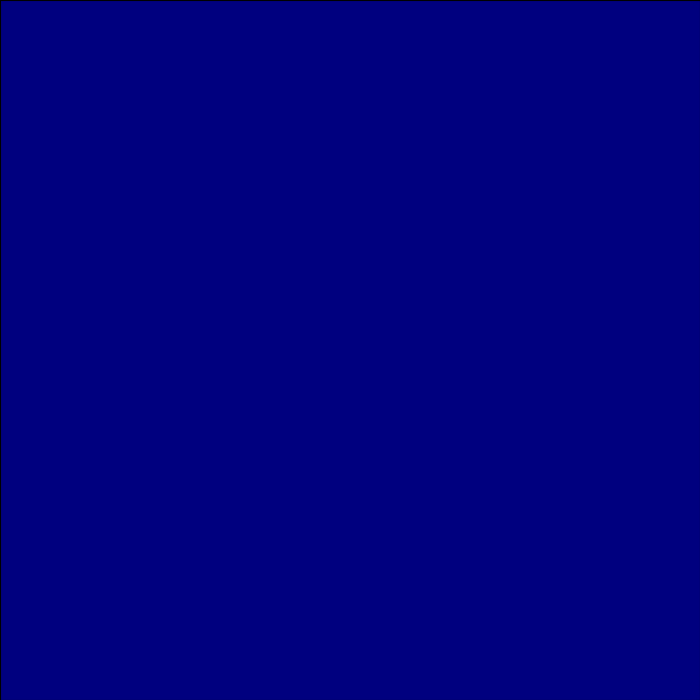

In [3]:
from ipyshow.fractals.core import FractalBrowser
logging.basicConfig(level=logging.WARNING)

#syst = mandelbrot
syst = julia(lambda z: square(z)-.4+.6j)
#syst = julia(lambda z: square(z)-.8+.156j)
#syst = julia(lambda z: square(z)+.285+.01j)
#syst = julia(lambda z: z*square(z)+.4)
#syst = julia(lambda z: z**7+.626)
#syst = julia(lambda z: exp(z*square(z))-.59)
#syst = julia(lambda z: exp(z*square(z))+-.621)
#syst = julia(lambda z: z-(z-1./square(z))/3.)
#syst = julia((lambda z: .25*(1+4*z-(1+2*z)*cos(pi*z))),eoracle=4)

FractalBrowser(
  syst,
  fig_kw=dict(figsize=(7,7)),
  resolution=160000,
)